In [252]:
"""
An implementation of the basic model described in Chan, Nicholas Tung, and Christian Shelton.
"An electronic market-maker." (2001).
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [253]:
""" 
Setting up simulation parameters.
"""

Initial_Price = 200
Max_T =150

Prob_Price = 0.2

Prob_Price_Up = Prob_Price
Prob_Price_Down = Prob_Price

Prob_Uninformed = 0.1

Prob_Uninformed_Buy = Prob_Uninformed
Prob_Uninformed_Sell = Prob_Uninformed

Prob_Informed = 0.4

All_Prob = [Prob_Price_Up, Prob_Price_Down, Prob_Uninformed_Buy,
            Prob_Uninformed_Sell, Prob_Informed]

In [254]:
np.sum(All_Prob)

1.0

In [255]:
"""
Simulation events
"""

Event_Price_Change_Up = 0
Event_Price_Change_Down = 1
Event_Uninformed_Buy = 2
Event_Uninformed_Sell =3
Event_Informed_Arrival = 4

All_Event = [Event_Price_Change_Up, Event_Price_Change_Down, Event_Uninformed_Buy,
             Event_Uninformed_Sell, Event_Informed_Arrival]

In [256]:
"""
Simulating Poisson Process
"""

def simulate_events(probabilities=All_Prob):
    return np.random.choice(All_Event, p=probabilities, size=Max_T)

events = simulate_events()

In [257]:
events

array([4, 4, 4, 4, 4, 4, 0, 0, 2, 2, 4, 0, 4, 3, 0, 1, 4, 4, 4, 2, 4, 4,
       1, 4, 2, 1, 0, 1, 3, 4, 4, 0, 3, 4, 1, 2, 0, 0, 4, 4, 0, 1, 3, 2,
       4, 4, 4, 4, 1, 4, 1, 0, 3, 2, 4, 2, 1, 4, 3, 3, 1, 4, 0, 3, 0, 3,
       4, 4, 4, 2, 4, 4, 2, 0, 1, 2, 2, 4, 3, 4, 1, 3, 4, 3, 4, 1, 3, 4,
       0, 2, 4, 3, 0, 3, 1, 4, 4, 4, 2, 0, 2, 3, 0, 1, 4, 3, 2, 2, 4, 4,
       1, 2, 4, 4, 4, 0, 1, 4, 4, 4, 0, 3, 2, 3, 4, 1, 4, 2, 1, 0, 1, 2,
       4, 4, 4, 0, 0, 3, 1, 1, 4, 4, 4, 4, 1, 4, 1, 0, 0, 0])

In [258]:
"""
Simulating Price Process
"""

def simulate_fundamental_price(events):
    """ Given a sequence events, return a vector representing the time-series of
        the fundamental price. """

    price_changes = np.zeros(Max_T)
    
    price_changes[events == Event_Price_Change_Down] = -1
    price_changes[events == Event_Price_Change_Up] = +1
    return Initial_Price + np.cumsum(price_changes)

fundamental_price = simulate_fundamental_price(events)

In [259]:
fundamental_price

array([200., 200., 200., 200., 200., 200., 201., 202., 202., 202., 202.,
       203., 203., 203., 204., 203., 203., 203., 203., 203., 203., 203.,
       202., 202., 202., 201., 202., 201., 201., 201., 201., 202., 202.,
       202., 201., 201., 202., 203., 203., 203., 204., 203., 203., 203.,
       203., 203., 203., 203., 202., 202., 201., 202., 202., 202., 202.,
       202., 201., 201., 201., 201., 200., 200., 201., 201., 202., 202.,
       202., 202., 202., 202., 202., 202., 202., 203., 202., 202., 202.,
       202., 202., 202., 201., 201., 201., 201., 201., 200., 200., 200.,
       201., 201., 201., 201., 202., 202., 201., 201., 201., 201., 201.,
       202., 202., 202., 203., 202., 202., 202., 202., 202., 202., 202.,
       201., 201., 201., 201., 201., 202., 201., 201., 201., 201., 202.,
       202., 202., 202., 202., 201., 201., 201., 200., 201., 200., 200.,
       200., 200., 200., 201., 202., 202., 201., 200., 200., 200., 200.,
       200., 199., 199., 198., 199., 200., 201.])

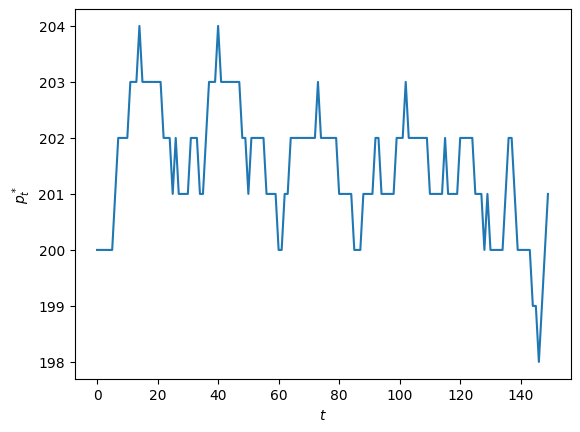

In [260]:
# a single realisation of the price process

plt.plot(fundamental_price)
plt.xlabel('$t$'); plt.ylabel('$p_t^*$')
plt.show()

In [261]:
# Uninformed Traders

def simulate_uninformed_orders(events):
    """ Given a sequence of events, return a vector representing the time-series of
        order-flow from uninformed traders. """
    orders = np.zeros(Max_T)
    orders[events == Event_Uninformed_Buy] = +1
    orders[events == Event_Uninformed_Sell] = -1
    return orders

uninformed_orders = simulate_uninformed_orders(events)
uninformed_orders

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
       -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -1.,  1.,  0.,  1.,  0.,  0., -1., -1.,  0.,  0.,  0., -1.,  0.,
       -1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
       -1.,  0.,  0., -1.,  0., -1.,  0.,  0., -1.,  0.,  0.,  1.,  0.,
       -1.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  1., -1.,  0.,  0.,
        0., -1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -1.,  1., -1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

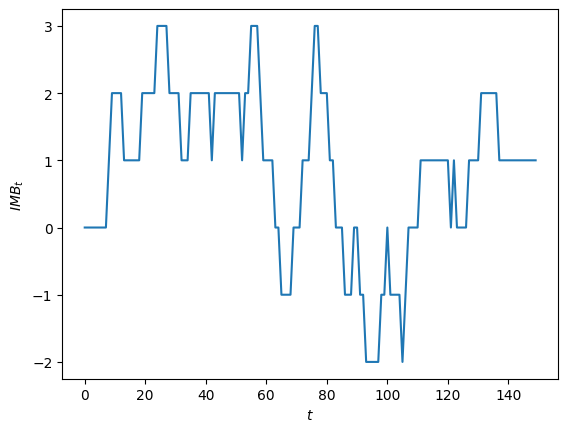

In [262]:
# Uninformed order-imbalance

plt.plot(np.cumsum(uninformed_orders))
plt.xlabel('$t$'); plt.ylabel('$IMB_t$')
plt.show()

In [263]:
# informed traders

def informed_strategy(current_price, mm_price):
    """
        Simulate an informed-trader
        :param current_price:   The current fundamental price
        :param mm_price:        The current market-maker quote
        :return:                The total shares demanded by the informed trader
        """
    if current_price > mm_price:
        return 1
    elif current_price < mm_price:
        return -1
    else:
        return 0

In [264]:
# market maker policy (strategy)
# a market-policy in which we increase (decrease) the price when it 
# reaches the positive (negative) of a pre-specified integer threshold.

def mm_threshold_strategy(order_imbalance, threshold=2):
    """
    :param imbalance:  The currently observed order-imbalance
    :return: The integer change in the market-maker's quote
    """
    if order_imbalance == -threshold:
        return -1
    elif order_imbalance == +threshold:
        return +1
    else:
        return 0

In [265]:
# mm reward

def mm_reward(current_fundamental_price, mm_current_price, order_sign):
    """
    Compute the change in the profit accrued to the  market-maker
    :param current_fundamental_price:  The current fundamental price.
    :param mm_current_price:           The market-maker's current quote.
    :param order_sign:                 +1 if the most recent transaction was buy,
                                        -1 if it is a sell, 0 for no transaction.
    """
    if order_sign < 0:
        return current_fundamental_price - mm_current_price
    elif order_sign > 0:
        return mm_current_price - current_fundamental_price
    else:
        return 0

In [266]:
# market simulation
# an intraday simulation of a simple high-frequency order-driven market

def simulate_market(events, uninformed_orders, fundamental_price, 
                    mm_strategy=mm_threshold_strategy, threshold=1):

    # Initialise time series
    mm_prices = np.zeros(Max_T)
    order_imbalances = np.zeros(Max_T)
    informed_orders = np.zeros(Max_T)
    rewards = np.zeros(Max_T)
    actions = np.zeros(Max_T)

    # The time of the last change to the market-maker's quote
    t_mm = 0

    # Initialise the quote to the initial fundamental price
    mm_current_price = Initial_Price

    for t in range(Max_T):

        # Calculate the order-flow for this time period; 
        # +1 for a buy order, or -1 for a sell order
        if events[t] == Event_Informed_Arrival:
            order = informed_strategy(fundamental_price[t], mm_current_price)
            informed_orders[t] = order
        else:
            order = uninformed_orders[t]

        # Calculate the aggregate order-imbalance (IMB) since the last change in quote
        imbalance = np.sum(informed_orders[t_mm:t] + uninformed_orders[t_mm:t])

        # Update the market maker's quote
        mm_price_delta = mm_strategy(imbalance, threshold)
        if mm_price_delta != 0:
            t_mm = t  # Update the time since the last quote change
            mm_current_price += mm_price_delta

        # Update time series
        order_imbalances[t] = imbalance
        mm_prices[t] = mm_current_price
        actions[t] = mm_price_delta
        rewards[t] = mm_reward(fundamental_price[t], mm_current_price, order)

    return mm_prices, order_imbalances, rewards, actions 

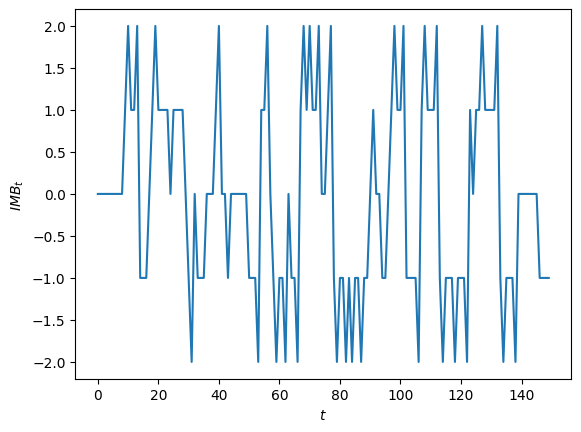

In [267]:
mm_prices, order_imbalances, rewards, actions = simulate_market(events, 
                                                                uninformed_orders,
                                                                fundamental_price, 
                                                                threshold=2)

# Order-imbalance time series

plt.plot(order_imbalances)
plt.xlabel('$t$')
plt.ylabel('$IMB_t$')
plt.show()

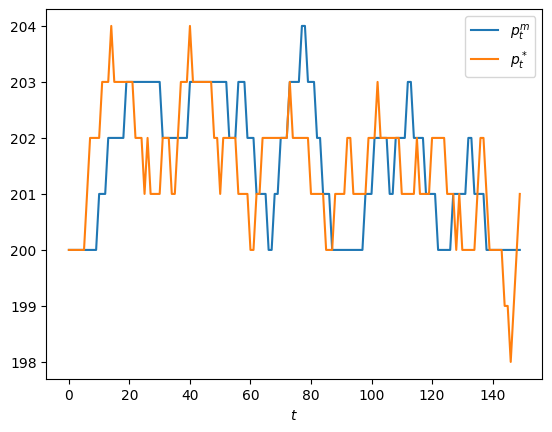

In [268]:
# price time series
plt.plot(mm_prices)
plt.plot(fundamental_price)
plt.xlabel('$t$')
plt.legend(['$p^m_t$','$p^*_t$'])
plt.show()

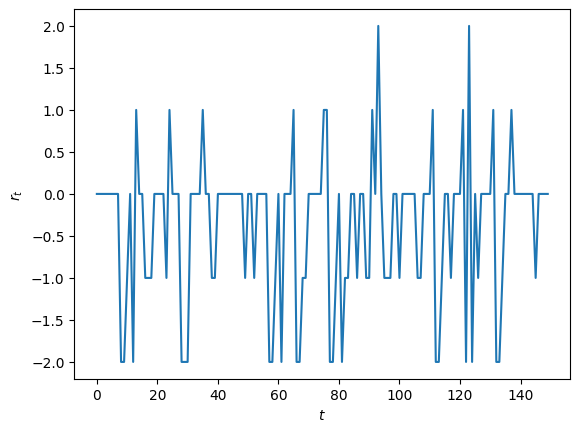

In [269]:
# reward time series r_t
plt.plot(rewards)
plt.xlabel('$t$')
plt.ylabel('$r_t$')
plt.show()

In [270]:
np.mean(rewards)*Max_T

-54.0

In [271]:
# run the simulation using Monte Carlo

def simulate_all(mm_strategy=mm_threshold_strategy, 
                 threshold=1, probabilities=All_Prob):
    events = simulate_events(probabilities)
    fundamental_price = simulate_fundamental_price(events)
    uninformed_orders = simulate_uninformed_orders(events)

    return simulate_market(events, uninformed_orders, fundamental_price, mm_strategy, threshold)

In [272]:
mm_prices, order_imbalances, rewards, actions = simulate_all(threshold=1)
np.mean(rewards)

-0.4666666666666667

In [273]:
# Using the sample-mean to estimate expected value

def evaluate(policy, probabilities=All_Prob, samples=1000):
    return np.mean([np.mean(simulate_all(threshold=policy)[2])
                        for i in range(samples)])

In [274]:
# Comparing policies
evaluate(policy=1)

-0.44164

In [275]:
evaluate(policy=2)

-0.5377733333333333

In [276]:
evaluate(policy=3)

-0.6807866666666667

In [277]:
# estimate the value of a given state assumming a fixed policy
# for a threshold h=2, the states are {-2, -1, 0, +1, +2}

mm_prices, order_imbalances, rewards, actions = simulate_all(threshold=2)

np.mean(rewards)

-0.8133333333333334

In [278]:
# estimate values for those rewards obtained in the given state

value_fn = {(state, np.mean(rewards[order_imbalances == state])) 
                for state in [-2, -1, 0, +1, +2]}

value_fn

{(-2, -0.42857142857142855),
 (-1, -1.0),
 (0, -0.9807692307692307),
 (1, -0.8571428571428571),
 (2, 0.0)}

In [279]:
value_dict = dict(value_fn)
value_dict

{-1: -1.0,
 0: -0.9807692307692307,
 2: 0.0,
 -2: -0.42857142857142855,
 1: -0.8571428571428571}

In [280]:
value_dict[1]

-0.8571428571428571

In [281]:
# averaging over more episodes (samples)

def expected_reward_by_state(mm_strategy, threshold, 
                             probabilities=All_Prob, 
                             samples=1000):
    
    states = range(-threshold, threshold+1)
    result = np.zeros((samples, len(states)))

    for i in range(samples):
        rewards = simulate_all(mm_strategy, threshold)[2]
        result[i, :] = [np.mean(rewards[order_imbalances == state]) 
                            for state in states]

    return dict(zip(states, np.nanmean(result, axis=0)))

In [282]:
# policy comparision 

expected_reward_by_state(mm_threshold_strategy, threshold=1)

{-1: -0.4404000000000005, 0: -0.42263461538461544, 1: -0.44691428571428565}

In [283]:
expected_reward_by_state(mm_threshold_strategy, threshold=2)

{-2: -0.5582857142857152,
 -1: -0.5427142857142857,
 0: -0.5304615384615391,
 1: -0.5462571428571433,
 2: -0.5587142857142858}

In [284]:
# creating a table of Q values for every state-action 

def q_table(result, all_actions, all_states):
    return pd.DataFrame(result, 
                        columns=["$\Delta p=%s$" % a for a in all_actions],
                        index=all_states)

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/var/folders/7q/6sr3f8p154zcxjkx38dw3tfc0000gn/T/ipykernel_37008/2733769078.py:5: SyntaxWarning: invalid escape sequence '\D'
  columns=["$\Delta p=%s$" % a for a in all_actions],


In [285]:
def expected_reward_by_state_action(mm_strategy, threshold, 
                                    probabilities=All_Prob, 
                                    samples=1000):

    all_states = range(-threshold, threshold+1)
    all_actions = [-1, 0, +1]
    result = np.zeros((samples, len(all_states), len(all_actions)))

    for i in range(samples):

        _, states, rewards, actions = simulate_all(mm_strategy, threshold)

        result[i, :, :] = np.reshape(
            [np.nanmean(rewards[(states == state) & (actions == action)])
                for state in all_states for action in all_actions],
            (len(all_states), len(all_actions)))

    return np.nanmean(result, axis=0)

In [286]:
Q = expected_reward_by_state_action(mm_threshold_strategy, 
                                    threshold=2, 
                                    samples=10000)
q_table(Q, [-1, 0, +1], range(-2, 3))

/var/folders/7q/6sr3f8p154zcxjkx38dw3tfc0000gn/T/ipykernel_37008/2686135094.py:14: RuntimeWarning: Mean of empty slice
  [np.nanmean(rewards[(states == state) & (actions == action)])
/var/folders/7q/6sr3f8p154zcxjkx38dw3tfc0000gn/T/ipykernel_37008/2686135094.py:18: RuntimeWarning: Mean of empty slice
  return np.nanmean(result, axis=0)


,$\Delta p=-1$,$\Delta p=0$,$\Delta p=1$
-2,-0.389542,NaN,NaN
-1,NaN,-0.568207,NaN
0,NaN,-0.555523,NaN
1,NaN,-0.564248,NaN
2,NaN,NaN,-0.385361


In [287]:
# Exploration of the state-space

def mm_exploration_strategy(order_imbalance, 
                            threshold=2, 
                            epsilon=0.025):
    if np.random.random() <= epsilon:
        return np.random.choice([-1, 0, +1])
    else:
        if order_imbalance == +threshold:
            return -1
        elif order_imbalance == -threshold:
            return +1
        else:
            return 0

In [288]:
# Results from Monte-Carlo policy evaluation

Q = expected_reward_by_state_action(mm_exploration_strategy, 
                                    threshold=2, 
                                    samples=50000)

q_table(Q, [-1, 0, +1], range(-2, 3))

/var/folders/7q/6sr3f8p154zcxjkx38dw3tfc0000gn/T/ipykernel_37008/2686135094.py:14: RuntimeWarning: Mean of empty slice
  [np.nanmean(rewards[(states == state) & (actions == action)])


,$\Delta p=-1$,$\Delta p=0$,$\Delta p=1$
-2,-5.569425,-6.384735,-5.969142
-1,-5.642464,-6.103621,-6.210848
0,-5.766053,-5.793669,-5.788253
1,-6.079657,-6.098584,-5.835751
2,-5.935139,-6.064833,-5.817355


In [289]:
# greedy policy as a dictionary where the keys are states,
# and the value is the optimal action

dict({(s, np.where(Q[s+2, :] == np.max(Q[s+2, :]))[0][0] - 1) for s in range(-2, 3)})

{2: 1, -1: -1, -2: -1, 1: 1, 0: -1}

In [290]:
# Policy improvement & Generalised Policy Iteration

all_actions = [-1, 0, +1]
all_states = range(-2, +3)

def initialise_learner():
    return np.zeros((len(all_states), len(all_actions)))

In [291]:
Q = initialise_learner()
q_table(Q, all_actions, all_states)

,$\Delta p=-1$,$\Delta p=0$,$\Delta p=1$
-2,0.0,0.0,0.0
-1,0.0,0.0,0.0
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0


In [292]:
# to map from the state & action space into indices of the matrix

def state(imbalance, all_states=range(-2, +3)):
    s = int(imbalance) - all_states[0]
    ms = len(all_states) - 1
    if s > ms:
        return ms
    elif s < 0:
        return 0
    else:
        return s

def action(price_delta):
    return int(price_delta) + 1

In [293]:
# to obtain Q values from specified actions and states

def q_values(Q, imbalance):
    return Q[state(imbalance), :]

In [294]:
def q_value(Q, imbalance, price_delta):
    return Q[state(imbalance), action(price_delta)]

In [295]:
# Temporal-difference (TD) learning

def update_learner(s, a, r, s_, a_, Q, alpha=0.01, gamma=0.0):
    """
    Update the Q values from feedback with the environment
    :param s:   The previous state
    :param a:   The previous action
    :param r:  The previous reward
    :param s_:  The current state
    :param a_:  The current action
    """
    Q[state(s), action(a)] += alpha * (r + gamma * q_value(Q, s_, a_) - 
                                       q_value(Q, s, a))

In [296]:
# market-maker as a reinforcement-learning agent
# implementaiton of the SARSA on-policy control algorithm

def simulate_learning_mm(Q, events, uninformed_orders, 
                         fundamental_price, mm_policy):
    mm_prices = np.zeros(Max_T, dtype=int)
    order_imbalances = np.zeros(Max_T)
    informed_orders = np.zeros(Max_T, dtype=int)
    rewards = np.zeros(Max_T)
    actions = np.zeros(Max_T, dtype=int)
    mm_t_last_change = 0
    mm_current_price = Initial_Price

    for t in range(Max_T):
        if events[t] == Event_Informed_Arrival:
            order = informed_strategy(fundamental_price[t], mm_current_price)
            informed_orders[t] = order
        else:
            order = uninformed_orders[t]
            
        imbalance = np.sum(informed_orders[mm_t_last_change:t] + uninformed_orders[mm_t_last_change:t])
        mm_price_delta = mm_policy(imbalance)
        
        if mm_price_delta != 0:
            mm_t_last_change = t
            mm_current_price += mm_price_delta
        order_imbalances[t] = imbalance
        mm_prices[t] = mm_current_price
        actions[t] = mm_price_delta
        rewards[t] = mm_reward(fundamental_price[t], mm_current_price, order)

        if t>0:
            update_learner(order_imbalances[t-1], actions[t-1], 
                           rewards[t-1], imbalance, 
                           mm_price_delta, Q)
            
    return fundamental_price, mm_prices, order_imbalances, rewards, actions, Q

In [297]:
# combine policy improvement and policy estimation in a single step
# use TD learning to bootstrap Q values, and then form an greedy policy using our value estimates

def mm_learning_strategy(Q, s, epsilon=0.1):
    if np.random.random() <= epsilon:
        action = np.random.choice([-1, 0, +1])
    else:
        values = q_values(Q, s)
        max_value = np.max(values)
        action = np.random.choice(np.where(values == max_value)[0]) - 1
    return action

In [298]:
# policy which uses SARSA for action-selection

def  simulate_learning(Q, probabilities=All_Prob):

    events = simulate_events(probabilities)
    fundamental_price = simulate_fundamental_price(events)
    uninformed_orders = simulate_uninformed_orders(events)

    def sarsa(s):
        return mm_learning_strategy(Q, s)

    return simulate_learning_mm(Q, events, uninformed_orders, fundamental_price, mm_policy=sarsa)

In [299]:
# Learning over a single episode

Q = initialise_learner()

In [300]:
fundamental_price, mm_prices, order_imbalances, rewards, actions, Q = simulate_learning(Q)

In [301]:
q_table(Q, all_actions, all_states)

,$\Delta p=-1$,$\Delta p=0$,$\Delta p=1$
-2,-0.070300,-0.079600,0.000000
-1,-0.110000,-0.049107,-0.079500
0,-0.646164,-0.695494,-0.627149
1,-0.545572,-0.562098,-0.456031
2,-0.167508,-0.457971,-0.208806


In [302]:
# Learning over many episodes
# iterate over many trading days (i.e. episodes) in order to gradually learn the optimal policy
# each episode is independent, re-use the Q-values from the previous episode

Episodes = 5000

for i in range(Episodes):
    fundamental_price, mm_prices, order_imbalances, rewards, actions, Q = simulate_learning(Q)

In [303]:
q_table(Q, all_actions, all_states)

,$\Delta p=-1$,$\Delta p=0$,$\Delta p=1$
-2,-1.973710,-1.093593,-1.942426
-1,-0.417869,-1.700460,-1.471942
0,-1.034847,-0.564580,-0.855539
1,-1.090022,-0.929799,-0.281889
2,-1.382048,-1.436520,-0.757188


In [304]:
# The greedy policy:
{(s, np.where(Q[state(s), :] == np.max(Q[state(s), :]))[0][0] - 1) for s in all_states}

{(-2, 0), (-1, -1), (0, 0), (1, 1), (2, 1)}

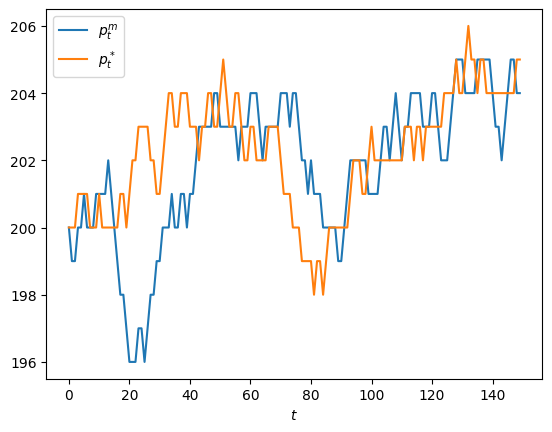

In [305]:
# The prices from the final trading day
plt.plot(mm_prices)
plt.plot(fundamental_price)
plt.xlabel('$t$')
plt.legend(['$p^m_t$','$p^*_t$'])
plt.show()

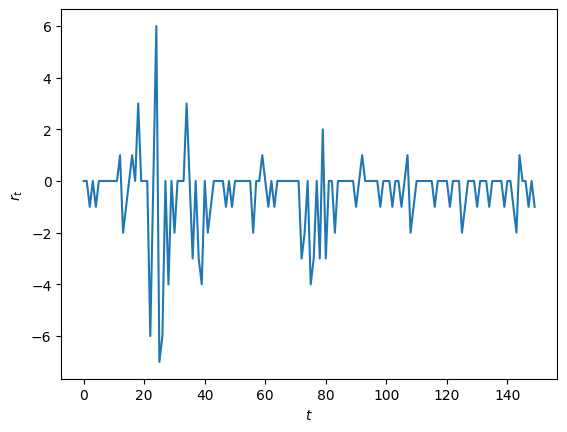

In [306]:
# The rewards in the final day
plt.plot(rewards)
plt.xlabel('$t$')
plt.ylabel('$r_t$')
plt.show()